In [1]:
# Importing required modules
import tweepy
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

In [2]:
# twitter app tokens and secrect tokens wich will be changed genetate your own
auth = tweepy.OAuthHandler('wd222WXy7THr8nazBIU0jiTTw', 'WXY3DcJxf9qyECjP7sx5RkC8AZraFJz2nF18JY3goyrg62vVLs')
auth.set_access_token('4749906512-z5KVHoLZk5NnSzGPKQ2fIuHmkqZe0sOs0AEoE8W', 'd728FjOCcduY7oNAJEaBaGkibMZIhJXGxSPoVYKyjAgfu')
api = tweepy.API(auth)

In [3]:
# get all tweets (convert iterators to iterables)
tweets = list()
for tweet in tweepy.Cursor(api.user_timeline, id="RONBupdates", rpp=500, lang="en").items(500):
# for tweet in tweepy.Cursor(api.search, q='#blm', rpp=100, lang="en").items(100):
    tweets.append(tweet)

In [4]:
# Get required informations from the tweets
df = pd.DataFrame([tweet.text for tweet in tweets], columns=['Tweets'])
df['Retweets'] = [tweet.retweet_count for tweet in tweets]
df['Likes'] = [tweet.favorite_count for tweet in tweets]
df.head()

,Tweets,Retweets,Likes
0,New Case Alert: 38 new COVID-19 cases confirme...,12,228
1,Nyaano Swaagat is doing a great job. Kudos to ...,0,35
2,A meeting of the High Level Coordinating Commi...,1,150
3,सुदूरपश्चिममा स्वाब सङ्कलन स्थगित: Swab collec...,0,104
4,View of Pokhara valley from Statue of Prithvi ...,18,407


In [5]:
# remove unwanted text
def removeUnwanted(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT\s+:', '', text)
    text = re.sub(r'\n+', '', text)
    text = re.sub(r'https?\/\/\S+', '', text)
    return text

In [6]:
df['Tweets'] = df['Tweets'].apply(removeUnwanted)
df.head()

,Tweets,Retweets,Likes
0,New Case Alert: 38 new COVID-19 cases confirme...,12,228
1,Nyaano Swaagat is doing a great job. Kudos to ...,0,35
2,A meeting of the High Level Coordinating Commi...,1,150
3,सुदूरपश्चिममा स्वाब सङ्कलन स्थगित: Swab collec...,0,104
4,View of Pokhara valley from Statue of Prithvi ...,18,407


In [7]:
# get subjectivity and polarity of the text
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df.head()

,Tweets,Retweets,Likes,Subjectivity,Polarity
0,New Case Alert: 38 new COVID-19 cases confirme...,12,228,0.636364,0.224242
1,Nyaano Swaagat is doing a great job. Kudos to ...,0,35,0.575000,0.500000
2,A meeting of the High Level Coordinating Commi...,1,150,0.540000,0.160000
3,सुदूरपश्चिममा स्वाब सङ्कलन स्थगित: Swab collec...,0,104,0.000000,0.000000
4,View of Pokhara valley from Statue of Prithvi ...,18,407,0.000000,0.000000


In [9]:
# get data in user readable form
def analysis(val):
    if val > 0:
        return 'Positive'
    elif val < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,Tweets,Retweets,Likes,Subjectivity,Polarity,Analysis
0,New Case Alert: 38 new COVID-19 cases confirme...,12,228,0.636364,0.224242,Positive
1,Nyaano Swaagat is doing a great job. Kudos to ...,0,35,0.575000,0.500000,Positive
2,A meeting of the High Level Coordinating Commi...,1,150,0.540000,0.160000,Positive
3,सुदूरपश्चिममा स्वाब सङ्कलन स्थगित: Swab collec...,0,104,0.000000,0.000000,Neutral
4,View of Pokhara valley from Statue of Prithvi ...,18,407,0.000000,0.000000,Neutral


In [11]:
# separate positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets.head()

,Tweets,Retweets,Likes,Subjectivity,Polarity,Analysis
0,New Case Alert: 38 new COVID-19 cases confirme...,12,228,0.636364,0.224242,Positive
1,Nyaano Swaagat is doing a great job. Kudos to ...,0,35,0.575000,0.500000,Positive
2,A meeting of the High Level Coordinating Commi...,1,150,0.540000,0.160000,Positive
6,12th and 13th death due to COVID-19 in Nepal: ...,8,266,0.193750,0.018750,Positive
7,New Case Alert: 323 new COVID-19 cases confirm...,28,568,0.731818,0.214545,Positive


In [12]:
# separate negative tweets
ntweets = df[df.Analysis == "Negative"]
ntweets.head()

,Tweets,Retweets,Likes,Subjectivity,Polarity,Analysis
13,There are currently 2568 COVID-19 active cases...,7,300,0.50000,-0.066667,Negative
17,11th death due to COVID-19: A male from Surkh...,14,398,0.21875,-0.106250,Negative
22,There are currently 2334 COVID-19 active cases...,6,231,0.50000,-0.066667,Negative
28,10th Death Due to COVID-19 in Nepal: A 45 year...,7,133,0.16875,-0.006250,Negative
33,There are currently 2013 COVID-19 active cases...,6,331,0.50000,-0.066667,Negative


In [13]:
# separate neutral tweets
netweets = df[df.Analysis == "Neutral"]
netweets.head()

,Tweets,Retweets,Likes,Subjectivity,Polarity,Analysis
3,सुदूरपश्चिममा स्वाब सङ्कलन स्थगित: Swab collec...,0,104,0.000000,0.0,Neutral
4,View of Pokhara valley from Statue of Prithvi ...,18,407,0.000000,0.0,Neutral
5,Male had Asthma and Female had Kidney Problems.,2,144,0.133333,0.0,Neutral
8,"Beauty of Monsoon in Terathum, Nepal: वर्षा लग...",7,237,0.000000,0.0,Neutral
9,Recent PCR reports of 22 COVID-19 patients of ...,3,156,0.250000,0.0,Neutral


Text(0.5, 1.0, 'Tweets Positivity')

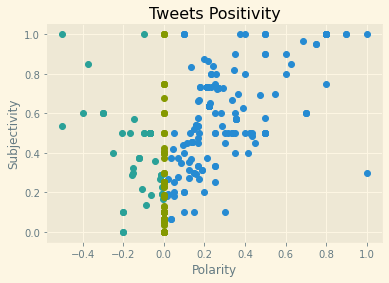

In [14]:
# get scatter plot of tweets
plt.style.use('Solarize_Light2')
plt.scatter(ptweets.Polarity, ptweets.Subjectivity)
plt.scatter(ntweets.Polarity, ntweets.Subjectivity)
plt.scatter(netweets.Polarity, netweets.Subjectivity)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Tweets Positivity')

Text(0.5, 1.0, 'Tweet type count')

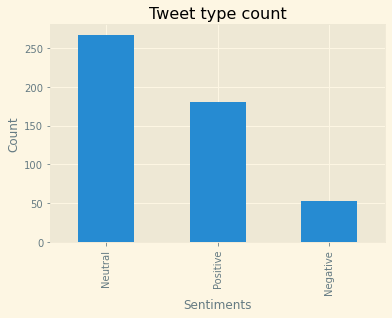

In [15]:
# show numbers in bar
df['Analysis'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Tweet type count')

Text(0.5, 1.0, 'Likes retweet count on types of post')

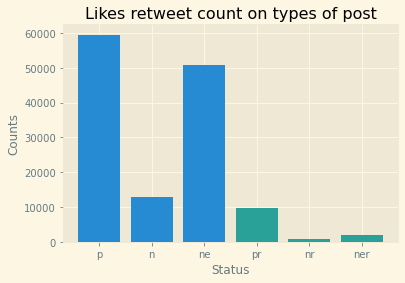

In [16]:
# display how much are positive or negative tweets are liked and retwitted
p = ptweets['Likes'].sum()
n = ntweets['Likes'].sum()
ne = netweets['Likes'].sum()
pr = ptweets['Retweets'].sum()
nr = ntweets['Retweets'].sum()
ner = netweets['Retweets'].sum()
plt.bar(['p', 'n', 'ne'], [p, n, ne])
plt.bar(['pr', 'nr', 'ner'], [pr, nr, ner])
plt.xlabel('Status')
plt.ylabel('Counts')
plt.title('Likes retweet count on types of post')

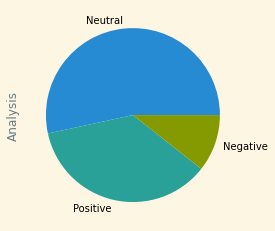

In [17]:
df['Analysis'].value_counts().plot(kind='pie')